In [5]:
!pip install tensorflow


In [9]:
pip install --upgrade tensorflow

In [35]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


# Importing Libraries

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Example usage of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

# You can now use `datagen` for image preprocessing

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [41]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 3737 files belonging to 8 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus']


# Loading Model

In [43]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

In [46]:
import cv2
print(cv2.__version__)

4.10.0


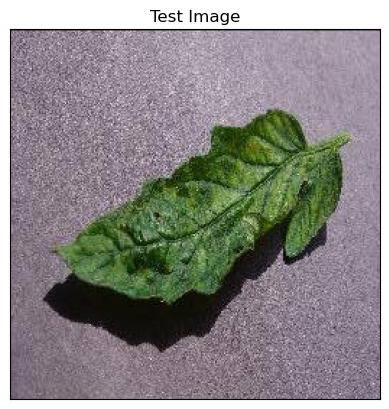

In [110]:
import matplotlib.pyplot as plt
import os

image_path = 'valid/Tomato___Tomato_mosaic_virus/02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG 2098_90deg.JPG'  # Update this path if needed

# Check if the file exists
if not os.path.isfile(image_path):
    print(f"File does not exist: {image_path}")
else:
    # Reading an image in default mode
    img = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if img is None:
        print("Error: Unable to read the image. Please check the file path.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
        
        # Displaying the image 
        plt.imshow(img)
        plt.title('Test Image')
        plt.xticks([])
        plt.yticks([])
        plt.show()

## Testing Model

In [113]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [115]:
print(predictions)

[[1.6758608e-11 8.9658508e-10 1.1257795e-10 6.9811740e-10 9.4529884e-10
  3.3625420e-09 1.0594383e-12 1.0000000e+00]]


In [117]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

7


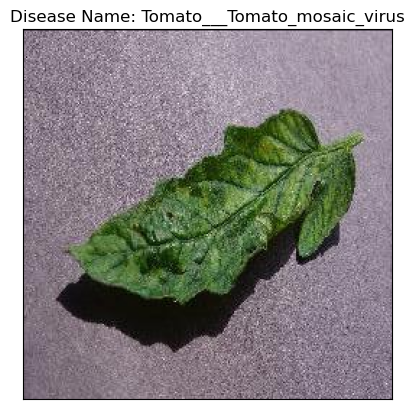

In [120]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()